Okay. So dataset provided is a csv with historical weather data. It is comprised of daily climate records from thousands of land surface stations across the globe. In this case, weather stations near Ann Arbor.

Goal would be to create a df with: data from 2005-2014; each row is a day; sorted in chronological order; each row containing the max and min values for that day; remove leap days; and this is for all years in that range...so there will be ~365 rows.

Then you can plot this data with matplotlib, and do everything that the assignment is requesting in regards to how the data is presented. 

And that's it.

Sidenote, as I look through the data for the first time. Each date has multiple maxes and mins (?). So for each date have to get the min/max of all possible min/max for a given day too....

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_weather_plot():
    weather_df = pd.read_csv('weather-data.csv')
    weather_df['Date'] = pd.to_datetime(weather_df['Date'])
    weather_df.sort_values(by='Date', inplace=True)
    
    # Create 2005-2014 df
    range_weather = weather_df[(weather_df['Date'] >= '2005-1-1') & (weather_df['Date'] <= '2014-12-31')]
    
    # Create just 2015 df
    twenty_fifteen_weather = weather_df[(weather_df['Date'] >= '2015-1-1') & (weather_df['Date'] <= '2015-12-31')]
    twenty_fifteen_weather['Date'] = pd.to_datetime(twenty_fifteen_weather['Date'])
    
    # Get row for each day w/ max and min for 2005-2014 df
    weather_df['year'] = weather_df['Date'].dt.year
    weather_df['month'] = weather_df['Date'].dt.month
    weather_df['day'] = weather_df['Date'].dt.day 
    
    max_temp = weather_df.groupby(['month','day'])["Data_Value"].max().tolist()
    min_temp = weather_df.groupby(['month','day'])["Data_Value"].min().tolist()
    
    # Get row for each day where 2015 broke a max or min
    
    twenty_fifteen_weather['year'] = twenty_fifteen_weather['Date'].dt.year
    twenty_fifteen_weather['month'] = twenty_fifteen_weather['Date'].dt.month
    twenty_fifteen_weather['day'] = twenty_fifteen_weather['Date'].dt.day 
    fifteen_values_max = twenty_fifteen_weather.groupby(['month','day'])["Data_Value"].max().tolist()
    fifteen_values_min = twenty_fifteen_weather.groupby(['month','day'])["Data_Value"].min().tolist()
    broke_record_values = []
    
    for i in range(len(fifteen_values_max)):
        if fifteen_values_max[i] > max_temp[i]:
            broke_record_values.append(fifteen_values_max[i])
        elif fifteen_values_min[i] < min_temp[i]:
            broke_record_values.append(fifteen_values_min[i])
        else:
            broke_record_values.append(None)
    
    # Plot the low of 2005-2014 as a line, high as a line
    x_points = np.array([x for x in range(366)])
    min_y_points = np.array(min_temp)
    max_y_points = np.array(max_temp)
    
    plt.plot(x_points, min_y_points)
    plt.plot(x_points, max_y_points)
    plt.fill_between(x_points, min_y_points, max_y_points, color='green', alpha=0.5)
    
    plt.title('Daily high and low temp in Ann Arbor area from 2005-2014')
    plt.ylabel("Temperature (tenths of degrees C)")
    plt.xlabel("Month")
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(np.linspace(0,365,12), months)
    
    scatter_x = x_points = np.array([x for x in range(365)])
    scatter_y = np.array(broke_record_values)
    plt.scatter(scatter_x, scatter_y, color='red')
    plt.legend(['Min Temp 2005-2014', 'Max Temp 2005-2014', 'Temp Difference', 'Record Broke in 2015'])
    
    plt.show()
    
    # Create a scatter of where 2015 broke record and overlay it on the high/low plot
    
    # Make it look nice (add labels, colors, shading, etc.)
    
    
    
    

/var/folders/s5/5lyfdf_95qd7_bnc50xdv3wm0000gn/T/ipykernel_73838/368493942.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifteen_weather['Date'] = pd.to_datetime(twenty_fifteen_weather['Date'])
/var/folders/s5/5lyfdf_95qd7_bnc50xdv3wm0000gn/T/ipykernel_73838/368493942.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifteen_weather['year'] = twenty_fifteen_weather['Date'].dt.year
/var/folders/s5/5lyfdf_95qd7_bnc50xdv3wm0000gn/T/ipykernel_73838/368493942.py:28: SettingWithCopyWarning

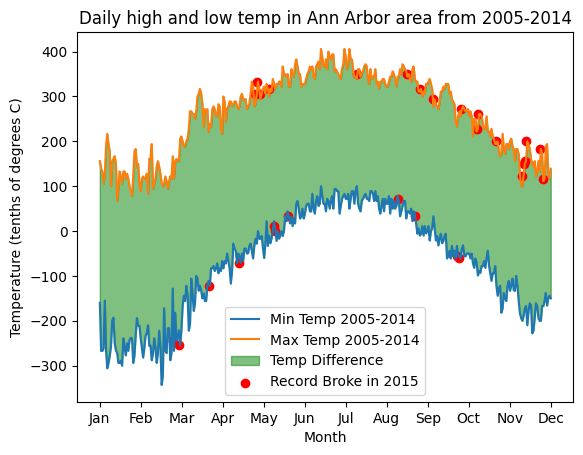

In [110]:
create_weather_plot()